In [ ]:
/resources/data/chronic_kidney_disease_updated.csv

['bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
      bp     sg   al   su     rbc        pc         pcc          ba  bgr   bu  \
age                                                                             
NaN  NaN    NaN  NaN  NaN     NaN       NaN         NaN         NaN  NaN  NaN   
48    80  1.020    1    0       ?    normal  notpresent  notpresent  121   36   
7     50  1.020    4    0       ?    normal  notpresent  notpresent    ?   18   
62    80  1.010    2    3  normal    normal  notpresent  notpresent  423   53   
48    70  1.005    4    0  normal  abnormal     present  notpresent  117   56   

     ...   pcv  wbcc rbcc  htn   dm  cad appet   pe  ane class  
age  ...                                                        
NaN  ...   NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN  
48   ...    44  7800  5.2  yes  yes   no  good   no   no   ckd  
7    .

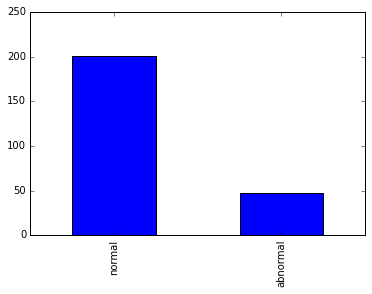

In [1]:
import pandas
import numpy as np
import re
import matplotlib as plt
% matplotlib inline

#Part 1
my_data = pandas.DataFrame.from_csv("/resources/data/chronic_kidney_disease_updated.csv")
#print my_data
columns = list(my_data.columns)
print columns

#Part 2. Display first 5 rows in the dataset
first_five_rows = [range(0,5)]

#map(lambda x: my_data.ix[x],first_five_rows)
print my_data[:5]

#3. Check if dataset is in cleaned form else clean it. Check Diabetes Mellitus(dm)
#variable and print what type of values it has.
#my_data.columns("Diabetes Mellitus")

my_data['dm'] #prints Diabetes Mellitus column
print my_data.dm.unique()

#4. The dataset is not in clean form. Write a function that takes pandas dataframe
#as an input and replace these characters i-e ( "\t", " ", "?") with "nan" 
#the function should apply this transformation to all columns 
#in dataframe and for cross check display unique values of Diabetes Mellitus(dm).


#my_data.replace(to_replace="\t([0-9,\.]+).*", value=r"\1", regex=True, inplace=True)

#my_data.replace(["\tno"," ","?","\tyes"," yes","\t?"],["no",np.nan,np.nan,"yes","yes",np.nan],inplace=True)
my_data.replace([ "\?|\s","\\\t[0-9|yes|no]*"],[np.nan,r"[0-9|yes|no]"],regex =True,inplace = True)

print my_data.dm.unique()

#5. Change datatype to Numerical of following columns in Dataframe. 
#columns = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
columns_to_numerics = ['bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc']

#pandas.to_numeric(my_data['wbcc'])
#my_data['wbcc']
#my_data.wbcc.unique()
for i in columns_to_numerics:
    my_data[i] = pandas.to_numeric(my_data[i]) # print to confirm data type 
    #my_data[i] = my_data[i].astype(np.float32) #make sure reassign so that changs ar permanent
#print type(my_data['hemo'])
#print type(my_data['sod'])

#6. Count the number of normal or abnormal red blood cells people having Chronic Kidney Disease(CKD)
#output: Count, preferred output is bar graph using matplotlib package.

normal_abnormal_count = pandas.value_counts(my_data['rbc'].values, sort=False)
print normal_abnormal_count
normal_abnormal_count.plot(kind='bar')

#7. Display maximum blood pressure having Chronic Kidney Disease(CKD).
#output: Number.


print max(my_data.loc[my_data['class']=='ckd','bp']) #so that it doesnt count nan as a vlaue

#8. Create a csv file of cleaned data in dataframe with name "clean_chronic_kidney_disease.csv"
#output: csv file

my_data.to_csv("/resources/data/cleaned_chronic_kidney_disease_updated.csv")










